<Center><h1> Credit card Segemntation
</h1> </center>


- Data file : CC GENERAL.csv
- V1 - 28-May-2018
- V2 - 07-June-2018



In [128]:
## including the necessary Libraries

import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import os
import datetime


In [2]:
os.listdir(".")

['.ipynb_checkpoints',
 'CC GENERAL.csv',
 'CREDIT CARD - SEGMENTATION CASE STUDY.pdf',
 'CreditCard_V1.ipynb']

In [3]:
cc=pd.read_table('CC GENERAL.csv', sep=",")

In [4]:
print "total argument", cc.shape


total argument (8950, 18)


In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [12]:
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


1 Data Preprocessing 
==
###### 1.1 : Checking the payment behaviour

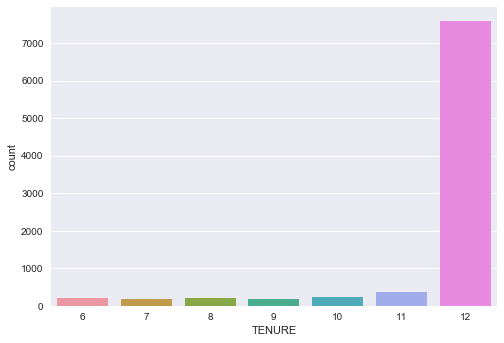

In [6]:
sns.countplot(cc.TENURE)

In [30]:
cc.PRC_FULL_PAYMENT.value_counts(normalize=True).round(4).to_frame().head()


,PRC_FULL_PAYMENT
0.000000,0.6596
1.000000,0.0545
0.083333,0.0476
0.166667,0.0185
0.250000,0.0174


- 65% customer not made single full payment 
- 5% customer made full payment 
- 1% custmore made 25% payment

In [34]:
cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

###### Data fix : 
1) Credit limit missing argument - one data pints, So ignoring that

In [206]:
cc.dropna(subset=["CREDIT_LIMIT"], inplace=True)

In [209]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 19 columns):
CUST_ID                             8949 non-null object
BALANCE                             8949 non-null float64
BALANCE_FREQUENCY                   8949 non-null float64
PURCHASES                           8949 non-null float64
ONEOFF_PURCHASES                    8949 non-null float64
INSTALLMENTS_PURCHASES              8949 non-null float64
CASH_ADVANCE                        8949 non-null float64
PURCHASES_FREQUENCY                 8949 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8949 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8949 non-null float64
CASH_ADVANCE_FREQUENCY              8949 non-null float64
CASH_ADVANCE_TRX                    8949 non-null int64
PURCHASES_TRX                       8949 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8949 non-null float64
MINIMUM_PAYMENTS            

###### 1.2 : Minimum Payment

In [43]:
cc.loc[(cc.MINIMUM_PAYMENTS > cc.PAYMENTS),"Min_due_payment_not_paid"]=1
cc.Min_due_payment_not_paid=cc.Min_due_payment_not_paid.fillna(0)

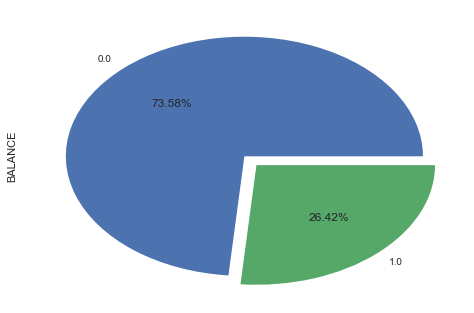

In [53]:
cc.groupby("Min_due_payment_not_paid")["BALANCE"].count().plot.pie(autopct="%.2f%%",explode=[0,.1])

26.42% customer, havent paid the  due amount, could be more riskey customer.

###### MINIMUM_PAYMENTS

missing details for 313 customers, lets see what the  data says

In [90]:
cc.loc[(cc.MINIMUM_PAYMENTS.isnull())& (cc.PAYMENTS==0) & ((cc.PURCHASES!=0) | (cc.CASH_ADVANCE!=0))].shape

(240, 19)

240 Clients having made some transaction (purchase or cash), but corrosponding min amount due and amount paid both are either missing or zero, definatly its a missing info. so ignoring such client otherwiase these could affect our result.

In [218]:
cc1=cc.loc[~((cc.MINIMUM_PAYMENTS.isnull())& (cc.PAYMENTS==0) & ((cc.PURCHASES!=0) | (cc.CASH_ADVANCE!=0)))].copy()
print "After removing the data total records to be analyze : ", cc1.shape[0]

After removing the data total records to be analyze :  8709


In [220]:
cc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8709 entries, 0 to 8949
Data columns (total 19 columns):
CUST_ID                             8709 non-null object
BALANCE                             8709 non-null float64
BALANCE_FREQUENCY                   8709 non-null float64
PURCHASES                           8709 non-null float64
ONEOFF_PURCHASES                    8709 non-null float64
INSTALLMENTS_PURCHASES              8709 non-null float64
CASH_ADVANCE                        8709 non-null float64
PURCHASES_FREQUENCY                 8709 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8709 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8709 non-null float64
CASH_ADVANCE_FREQUENCY              8709 non-null float64
CASH_ADVANCE_TRX                    8709 non-null int64
PURCHASES_TRX                       8709 non-null int64
CREDIT_LIMIT                        8709 non-null float64
PAYMENTS                            8709 non-null float64
MINIMUM_PAYMENTS            

Total 73 customer, having made some transaction, over the mantioned duration.
>- Fixing the missing due amount with the total payment by period of durations

In [219]:
cc1.MINIMUM_PAYMENTS.fillna(cc1.PURCHASES/ cc1.TENURE, inplace=True)

### 2.0 Multi Variate Analysis

###### 2.1 Co-relation matrices

In [214]:
cc1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Min_due_payment_not_paid
count,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000
mean,1587.842970,0.888668,1019.566493,601.022651,418.852331,986.117889,0.496080,0.204549,0.369532,0.136559,3.287174,14.959582,4510.216802,1781.103277,857.299610,0.157968,11.533012,0.271443
std,2091.840095,0.219319,2159.293011,1678.225235,913.827722,2114.396201,0.401204,0.299375,0.398244,0.201291,6.889681,25.091875,3651.898125,2920.261359,2363.831677,0.295384,1.312625,0.444730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.000000,0.000000,6.000000,0.000000
25%,137.744895,0.909091,45.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,414.951308,167.672071,0.000000,12.000000,0.000000
50%,903.297810,1.000000,372.160000,42.000000,95.550000,0.000000,0.500000,0.083333,0.181818,0.000000,0.000000,7.000000,3000.000000,890.174668,308.259890,0.000000,12.000000,0.000000
75%,2080.122570,1.000000,1133.540000,590.000000,480.000000,1116.430456,0.916667,0.333333,0.750000,0.250000,4.000000,17.000000,6500.000000,1941.959847,813.974537,0.166667,12.000000,1.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.000000


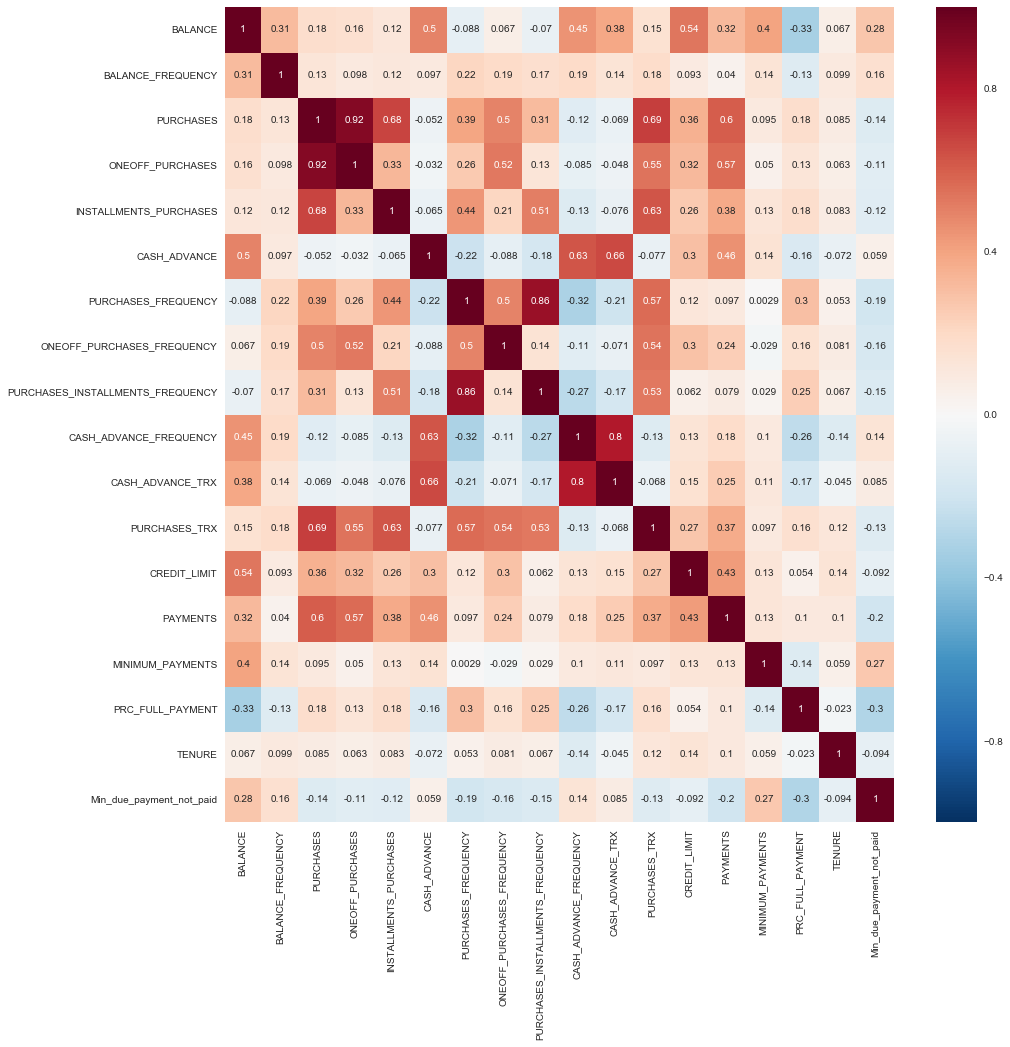

In [215]:
plt.figure(figsize=(15,15))
sns.heatmap(cc1.corr(),annot=True)

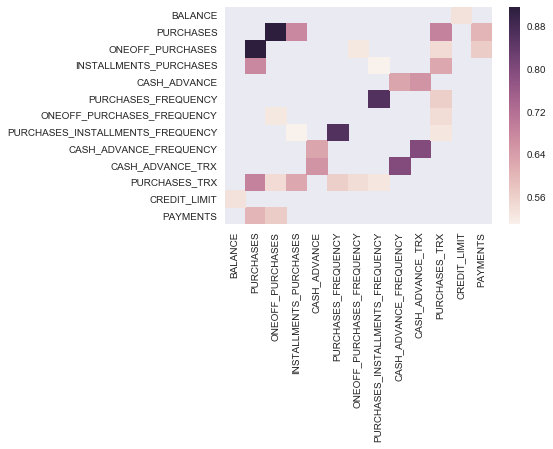

In [216]:
corr1=cc1.corr()
corr2=corr1[corr1 != 1][abs(corr1)>.5].dropna(how='all',axis=1).dropna(how='all', axis=0)
sns.heatmap(corr2)

>- Purchase is drived from oneoff_purchase and installment_purchase, so we can drop one varible calles purchases.

In [221]:
cc1.drop("PURCHASES", axis=1, inplace=True)
cc1.drop("CUST_ID", axis=1, inplace=True)

###### 2.2 standradizing the Data

In [222]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [223]:
sc=StandardScaler()
cc1_scaled=sc.fit_transform(cc1)

In [224]:
pd.DataFrame(cc1_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8.709000e+03,8.709000e+03,8.709000e+03,8.709000e+03,8.709000e+03,8.709000e+03,8.709000e+03,8.709000e+03,8.709000e+03,8.709000e+03,8.709000e+03,8.709000e+03,8.709000e+03,8.709000e+03,8.709000e+03,8.709000e+03,8.709000e+03
mean,-1.142794e-15,7.915945e-15,1.059811e-15,-4.738035e-15,5.589334e-15,5.089638e-17,1.176474e-14,-1.578202e-16,-7.033835e-16,8.793823e-16,1.645760e-15,7.198857e-15,-7.477975e-17,-1.020350e-16,-4.180935e-15,3.396474e-15,-3.426661e-17
std,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00
min,-7.591088e-01,-4.052183e+00,-3.581505e-01,-4.583757e-01,-4.664095e-01,-1.236549e+00,-6.832951e-01,-9.279565e-01,-6.784557e-01,-4.771430e-01,-5.962265e-01,-1.221412e+00,-6.099303e-01,-3.626945e-01,-5.348208e-01,-4.215467e+00,-6.103907e-01
25%,-6.932563e-01,9.312700e-02,-3.581505e-01,-4.583757e-01,-4.664095e-01,-1.028830e+00,-6.832951e-01,-9.279565e-01,-6.784557e-01,-4.771430e-01,-5.563707e-01,-7.969510e-01,-4.678453e-01,-2.917581e-01,-5.348208e-01,3.557869e-01,-6.103907e-01
50%,-3.272642e-01,5.076575e-01,-3.331226e-01,-3.538095e-01,-4.664095e-01,9.770396e-03,-4.049222e-01,-4.713811e-01,-6.784557e-01,-4.771430e-01,-3.172357e-01,-4.135667e-01,-3.051027e-01,-2.322802e-01,-5.348208e-01,3.557869e-01,-6.103907e-01
75%,2.353468e-01,5.076575e-01,-6.568418e-03,6.691762e-02,6.163464e-02,1.048370e+00,4.301997e-01,9.554189e-01,5.635965e-01,1.034688e-01,8.132254e-02,5.448940e-01,5.508610e-02,-1.832938e-02,2.945043e-02,3.557869e-01,1.638295e+00
max,8.344948e+00,5.076575e-01,2.393155e+01,2.416475e+01,2.182833e+01,1.256089e+00,2.657193e+00,1.583211e+00,6.773858e+00,1.737667e+01,1.367216e+01,6.980273e+00,1.675987e+01,3.196219e+01,2.850800e+00,3.557869e-01,1.638295e+00


###### 2.3 Applying PCA

In [225]:
from sklearn.decomposition import PCA

In [230]:
pc=PCA(n_components=17, random_state=123)
pc.fit(cc1_scaled)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)

In [233]:
### explained Varience Ration

var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n, random_state=12)
    cc_fit=pc.fit(cc1_scaled)
    var_ratio[n]=sum(cc_fit.explained_variance_ratio_)
var_ratio

{2: 0.43789575119217894,
 3: 0.53327744552498191,
 4: 0.61029656473432392,
 5: 0.67300462975038344,
 6: 0.73273681218136211,
 7: 0.77855054862117268,
 8: 0.82108636265142942,
 9: 0.85834761758493294,
 10: 0.89328461797683878,
 11: 0.92373801750416529,
 12: 0.9457585312761424,
 13: 0.96282970779976129,
 14: 0.97677599790024838,
 15: 0.9873816641289368,
 16: 0.99730415432226893,
 17: 0.99999999999999989}

In [257]:
a1=pd.DataFrame(var_ratio.items(), index=var_ratio.keys(), columns=["key", "ratio"])
a1

,key,ratio
2,2,0.437896
3,3,0.533277
4,4,0.610297
5,5,0.673005
6,6,0.732737
7,7,0.778551
8,8,0.821086
9,9,0.858348
10,10,0.893285
11,11,0.923738


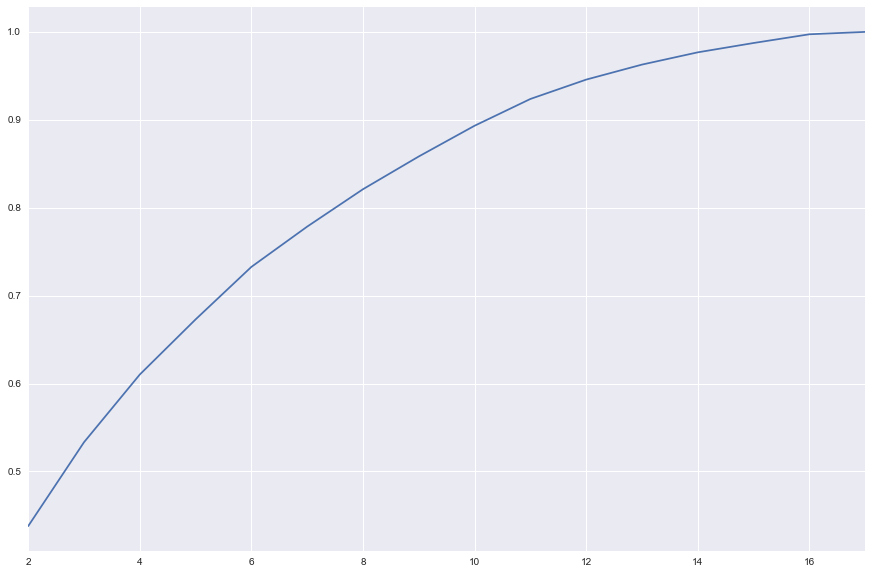

In [263]:
plt.figure(figsize=(15,10))
a1.ratio.plot()

In [264]:
pc_final=PCA(n_components=12).fit(cc1_scaled)
reduce_cr=pc_final.fit_transform(cc1_scaled)

In [265]:
pd.DataFrame(reduce_cr).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.293318,-1.562168,-0.284648,0.572844,0.173374,-0.453622,0.774300,-0.091833,0.037610,0.565217,0.127310,-0.110594
1,-1.506683,2.023033,-1.356013,0.186742,0.884771,-0.608446,-0.575814,0.039777,-0.565393,0.599566,-0.593889,-0.935039
2,0.879865,0.109489,1.197986,1.617617,-2.067502,-0.077847,-1.272949,-0.055966,0.641919,-1.120637,-0.278065,-1.099087
3,-1.289835,-1.140990,-0.041912,0.790955,-0.291392,-0.673080,0.589566,0.082641,-0.364140,0.973174,0.190122,-0.257837
4,0.092936,-0.510329,2.176965,0.078487,0.775059,0.280184,0.664980,0.083923,-0.679616,-0.369163,-0.346830,-0.342919


In [269]:
reduce_df=PCA(n_components=12).fit_transform(cc1_scaled)
pd.DataFrame(reduce_df).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.293318,-1.562168,-0.284648,0.572844,0.173374,-0.453622,0.774300,-0.091833,0.037610,0.565217,0.127310,-0.110594
1,-1.506683,2.023033,-1.356013,0.186742,0.884771,-0.608446,-0.575814,0.039777,-0.565393,0.599566,-0.593889,-0.935039
2,0.879865,0.109489,1.197986,1.617617,-2.067502,-0.077847,-1.272949,-0.055966,0.641919,-1.120637,-0.278065,-1.099087
3,-1.289835,-1.140990,-0.041912,0.790955,-0.291392,-0.673080,0.589566,0.082641,-0.364140,0.973174,0.190122,-0.257837
4,0.092936,-0.510329,2.176965,0.078487,0.775059,0.280184,0.664980,0.083923,-0.679616,-0.369163,-0.346830,-0.342919


In [271]:
cc1.columns

Index([u'BALANCE', u'BALANCE_FREQUENCY', u'ONEOFF_PURCHASES',
       u'INSTALLMENTS_PURCHASES', u'CASH_ADVANCE', u'PURCHASES_FREQUENCY',
       u'ONEOFF_PURCHASES_FREQUENCY', u'PURCHASES_INSTALLMENTS_FREQUENCY',
       u'CASH_ADVANCE_FREQUENCY', u'CASH_ADVANCE_TRX', u'PURCHASES_TRX',
       u'CREDIT_LIMIT', u'PAYMENTS', u'MINIMUM_PAYMENTS', u'PRC_FULL_PAYMENT',
       u'TENURE', u'Min_due_payment_not_paid'],
      dtype='object')

In [278]:
print reduce_df.

<built-in method item of numpy.ndarray object at 0x000000003FAD3B20>


###### Clustring


In [279]:
list_var = ['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',  'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS']

In [280]:
cc1_selected1=pd.DataFrame(cc1, columns=list_var)
cc1_selected1.head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS
0,40.900749,0.818182,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763
5,1809.828751,1.000000,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770


In [282]:
km_3=KMeans(n_clusters=3,random_state=123).fit(cc1_selected1)
km_3.labels_

array([0, 1, 1, ..., 0, 0, 0])

In [283]:
pd.Series(km_3.labels_).value_counts()

0    6157
1    2379
2     173
dtype: int64

In [284]:
km_4=KMeans(n_clusters=4,random_state=123).fit(cc1_selected1)
pd.Series(km_4.labels_).value_counts()

0    5246
3    2485
2     887
1      91
dtype: int64

In [286]:
dir(km_4)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_fit_data',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_transform',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']

In [287]:
km_5=KMeans(n_clusters=5,random_state=123).fit(cc1_selected1)
km_6=KMeans(n_clusters=6,random_state=123).fit(cc1_selected1)
km_7=KMeans(n_clusters=7,random_state=123).fit(cc1_selected1)
km_8=KMeans(n_clusters=8,random_state=123).fit(cc1_selected1)
km_9=KMeans(n_clusters=9,random_state=123).fit(cc1_selected1)

In [290]:
# Conactenating labels found through Kmeans with data 
cc1["Cluster_3"]=km_3.labels_
cc1["Cluster_4"]=km_4.labels_
cc1["Cluster_5"]=km_5.labels_
cc1["Cluster_6"]=km_6.labels_
cc1["Cluster_7"]=km_7.labels_
cc1["Cluster_8"]=km_8.labels_
cc1["Cluster_9"]=km_9.labels_

In [291]:
cc1.head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,...,PRC_FULL_PAYMENT,TENURE,Min_due_payment_not_paid,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
0,40.900749,0.818182,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,...,0.000000,12,0.0,0,0,1,1,5,3,1
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,...,0.222222,12,0.0,1,2,3,4,3,4,7
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,...,0.000000,12,1.0,1,3,3,0,6,6,6
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,...,0.000000,12,0.0,0,0,1,1,5,3,1
5,1809.828751,1.000000,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,...,0.000000,12,1.0,0,0,1,1,5,3,1


In [292]:
pd.Series.sort_index(cc1.Cluster_3.value_counts())

0    6157
1    2379
2     173
Name: Cluster_3, dtype: int64

In [296]:
pd.Series(cc1.Cluster_3.size)

0    8709
dtype: int64

In [303]:
size=pd.concat([pd.Series(cc1.Cluster_3.size), pd.Series.sort_index(cc1.Cluster_3.value_counts()),
                #pd.Series(cc1.Cluster_4.size), 
                    pd.Series.sort_index(cc1.Cluster_4.value_counts()),
                #pd.Series(cc1.Cluster_5.size), 
                    pd.Series.sort_index(cc1.Cluster_5.value_counts()),
                #pd.Series(cc1.Cluster_6.size), 
                    pd.Series.sort_index(cc1.Cluster_6.value_counts()),
                #pd.Series(cc1.Cluster_7.size), 
                    pd.Series.sort_index(cc1.Cluster_7.value_counts()),
                #pd.Series(cc1.Cluster_8.size), 
                    pd.Series.sort_index(cc1.Cluster_8.value_counts()),
                #pd.Series(cc1.Cluster_9.size), 
                    pd.Series.sort_index(cc1.Cluster_9.value_counts())               
               ])

In [304]:
size.head(20)

0    8709
0    6157
1    2379
2     173
0    5246
1      91
2     887
3    2485
0     734
1    5176
2     309
3    2456
4      34
0    1771
1    5118
2     193
3      25
4    1078
5     524
0     568
dtype: int64

In [324]:
Seg_Size=pd.DataFrame(size,columns=["Seg_size"])
Seg_PCT=pd.DataFrame(size/cc1.Cluster_3.size, columns=["Seg_PCT"])
Seg_PCT.round(4).T

,0,0,1,2,0,1,2,3,0,1,...,7,0,1,2,3,4,5,6,7,8
Seg_PCT,1.0,0.707,0.2732,0.0199,0.6024,0.0104,0.1018,0.2853,0.0843,0.5943,...,0.0101,0.1134,0.5631,0.0025,0.0061,0.0489,0.04,0.1678,0.0253,0.033


In [325]:
Seg_Size.T

,0,0,1,2,0,1,2,3,0,1,...,7,0,1,2,3,4,5,6,7,8
Seg_size,8709,6157,2379,173,5246,91,887,2485,734,5176,...,88,988,4904,22,53,426,348,1461,220,287


In [333]:
# Mean value gives a good indication of the distribution of data. 
#So we are finding mean value for each variable for each cluster

profile_output=pd.concat([cc1.apply(lambda x: x.mean()).T,
           cc1.groupby("Cluster_3").apply(lambda x:x.mean()).T,
           cc1.groupby("Cluster_4").apply(lambda x:x.mean()).T,
           cc1.groupby("Cluster_5").apply(lambda x:x.mean()).T,
           cc1.groupby("Cluster_6").apply(lambda x:x.mean()).T,
           cc1.groupby("Cluster_7").apply(lambda x:x.mean()).T,
           cc1.groupby("Cluster_8").apply(lambda x:x.mean()).T,
           cc1.groupby("Cluster_9").apply(lambda x:x.mean()).T], axis=1)
profile_output.head(4)

,0,0,1,2,0,1,2,3,0,1,...,7,0,1,2,3,4,5,6,7,8
BALANCE,1587.842970,873.559689,3194.886740,4909.721780,801.151307,4873.043447,5323.743403,1794.799724,5358.571100,789.462795,...,5002.097399,3896.711180,779.286615,5604.719229,5126.351540,1421.049403,1921.195722,745.736112,4479.784256,8407.441160
BALANCE_FREQUENCY,0.888668,0.868380,0.939686,0.909138,0.865931,0.856234,0.960565,0.912190,0.956284,0.865245,...,0.869644,0.970011,0.866125,0.954132,0.808217,0.890373,0.915491,0.873371,0.951364,0.998416
ONEOFF_PURCHASES,601.022651,324.848967,965.438499,5418.687803,259.269668,7324.925714,1237.614408,849.032342,1134.806267,257.992956,...,764.499432,336.789302,242.624912,22779.189091,1305.446792,1156.599343,3614.001839,672.164784,400.976182,1117.643066
INSTALLMENTS_PURCHASES,418.852331,303.409295,585.152064,2240.561618,270.581716,2769.445055,748.726956,528.037408,730.382698,270.660006,...,600.240000,256.545020,266.032086,5463.240000,973.265283,704.378592,1576.560862,530.211451,269.682182,819.670070


In [332]:
profile_output_final=pd.concat([Seg_Size.T,Seg_PCT.T,profile_output])
profile_output_final.columns=["Overall","KM3_1","KM3_2","KM3_3",
                              "KM4_1","KM4_2","KM4_3","KM4_4",
                              "KM5_1","KM5_2","KM5_3","KM5_4","KM5_5",
                              "KM6_1","KM6_2","KM6_3","KM6_4","KM6_5","KM6_6",
                              "KM7_1","KM7_2","KM7_3","KM7_4","KM7_5","KM7_6","KM7_7",
                              "KM8_1","KM8_2","KM8_3","KM8_4","KM8_5","KM8_6","KM8_7","KM8_8",
                              "KM9_1","KM9_2","KM9_3","KM9_4","KM9_5","KM9_6","KM9_7","KM9_8","KM9_9"]  
profile_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM8_8,KM9_1,KM9_2,KM9_3,KM9_4,KM9_5,KM9_6,KM9_7,KM9_8,KM9_9
Seg_size,8709.000000,6157.000000,2379.000000,173.000000,5246.000000,91.000000,887.000000,2485.000000,734.000000,5176.000000,...,88.000000,988.000000,4904.000000,22.000000,53.000000,426.000000,348.000000,1461.000000,220.000000,287.000000
Seg_PCT,1.000000,0.706970,0.273166,0.019865,0.602365,0.010449,0.101849,0.285337,0.084281,0.594328,...,0.010104,0.113446,0.563096,0.002526,0.006086,0.048915,0.039959,0.167757,0.025261,0.032954
BALANCE,1587.842970,873.559689,3194.886740,4909.721780,801.151307,4873.043447,5323.743403,1794.799724,5358.571100,789.462795,...,5002.097399,3896.711180,779.286615,5604.719229,5126.351540,1421.049403,1921.195722,745.736112,4479.784256,8407.441160
BALANCE_FREQUENCY,0.888668,0.868380,0.939686,0.909138,0.865931,0.856234,0.960565,0.912190,0.956284,0.865245,...,0.869644,0.970011,0.866125,0.954132,0.808217,0.890373,0.915491,0.873371,0.951364,0.998416
ONEOFF_PURCHASES,601.022651,324.848967,965.438499,5418.687803,259.269668,7324.925714,1237.614408,849.032342,1134.806267,257.992956,...,764.499432,336.789302,242.624912,22779.189091,1305.446792,1156.599343,3614.001839,672.164784,400.976182,1117.643066
INSTALLMENTS_PURCHASES,418.852331,303.409295,585.152064,2240.561618,270.581716,2769.445055,748.726956,528.037408,730.382698,270.660006,...,600.240000,256.545020,266.032086,5463.240000,973.265283,704.378592,1576.560862,530.211451,269.682182,819.670070
CASH_ADVANCE,986.117889,494.006694,1840.342577,6753.332289,461.050481,7706.664629,3405.864642,984.757125,2399.667682,455.780484,...,11933.436751,2609.415841,424.228388,1014.206401,12521.465513,374.435011,705.963078,155.072081,7738.024005,3169.064673
PURCHASES_FREQUENCY,0.496080,0.475534,0.542030,0.595436,0.460599,0.629770,0.508810,0.561545,0.539376,0.461156,...,0.337256,0.332152,0.458988,0.900758,0.458977,0.675136,0.792973,0.632059,0.292679,0.507969
ONEOFF_PURCHASES_FREQUENCY,0.204549,0.154872,0.315921,0.441015,0.132839,0.477442,0.302089,0.311125,0.325540,0.131899,...,0.193993,0.153487,0.129114,0.843182,0.279507,0.426084,0.591736,0.319487,0.130681,0.279730
PURCHASES_INSTALLMENTS_FREQUENCY,0.369532,0.360314,0.385552,0.477293,0.355653,0.509636,0.373178,0.392400,0.384960,0.356740,...,0.263590,0.227478,0.355001,0.695454,0.374091,0.455875,0.599682,0.450306,0.196806,0.395011


In [334]:
profile_output_final.to_csv("Profiling_output.csv")

Silhouette  Cofficient
--
Finding the optimal cluster

In [337]:
### Calculating cilhoute score fir k=3
from sklearn import metrics
metrics.silhouette_score(cc1,km_3.labels_)

0.4571010517446234

In [345]:
### Calculating the cilhoutte Score

k_range=range(3,10)
Score=[]

for i in range(3,10):
    km=KMeans(n_clusters=i,random_state=123)
    cluster=km.fit(cc1)
    Score.append(metrics.silhouette_score(cc1,km.labels_))
Score  

[0.45763531614735231,
 0.46080755376985744,
 0.38905677137948363,
 0.38590518138972957,
 0.39588719023862151,
 0.3983758092300736,
 0.36692097780846894]

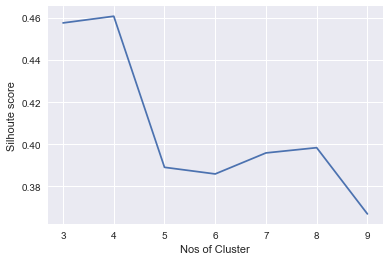

In [347]:
### PLot the result
plt.plot(range(3,10),Score)
plt.xlabel("Nos of Cluster")
plt.ylabel("Silhoute score")
plt.grid=True


Solution can be = 3 or 4